In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import math
from deepchecks.tabular.datasets.classification import adult 
from deepchecks.tabular.checks.data_integrity import FeatureFeatureCorrelation 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
import pickle

deepchecks - WARNING - You are using deepchecks version 0.13.1, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [2]:
data=pd.read_excel('car_insurance_claimproject.xlsx')

In [3]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939-03-16,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049,0,1956-01-21,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019,0,1951-11-18,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473,0,1964-03-05,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,450221861,0,1948-06-05,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10302 non-null  int64         
 1   KIDSDRIV    10302 non-null  int64         
 2   BIRTH       10302 non-null  datetime64[ns]
 3   AGE         10295 non-null  float64       
 4   HOMEKIDS    10302 non-null  int64         
 5   YOJ         9754 non-null   float64       
 6   INCOME      9732 non-null   float64       
 7   PARENT1     10302 non-null  object        
 8   HOME_VAL    9727 non-null   float64       
 9   MSTATUS     10302 non-null  object        
 10  GENDER      10302 non-null  object        
 11  EDUCATION   10302 non-null  object        
 12  OCCUPATION  9637 non-null   object        
 13  TRAVTIME    10302 non-null  int64         
 14  CAR_USE     10302 non-null  object        
 15  BLUEBOOK    10302 non-null  int64         
 16  TIF         10302 non-

In [5]:
print(f"Duplicates: {data.duplicated().sum()}")
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print the resultant rows
duplicate

Duplicates: 1
Duplicate Rows :


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
9801,279799481,0,1960-02-21,39.0,0,14.0,93077.0,No,244764.0,Yes,...,Minivan,yes,0,0,No,0,0,1.0,0,z_Highly Rural/ Rural


In [6]:
data.nunique()

ID            8753
KIDSDRIV         5
BIRTH         6560
AGE             61
HOMEKIDS         6
YOJ             21
INCOME        8151
PARENT1          2
HOME_VAL      6334
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME       100
CAR_USE          2
BLUEBOOK      2985
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      3545
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       2346
CAR_AGE         30
CLAIM_FLAG       2
URBANICITY       2
dtype: int64

In [7]:
data.CLM_AMT.value_counts()

0        7556
2327        4
3674        4
3350        4
4363        4
         ... 
5837        1
9663        1
856         1
24494       1
1815        1
Name: CLM_AMT, Length: 2346, dtype: int64

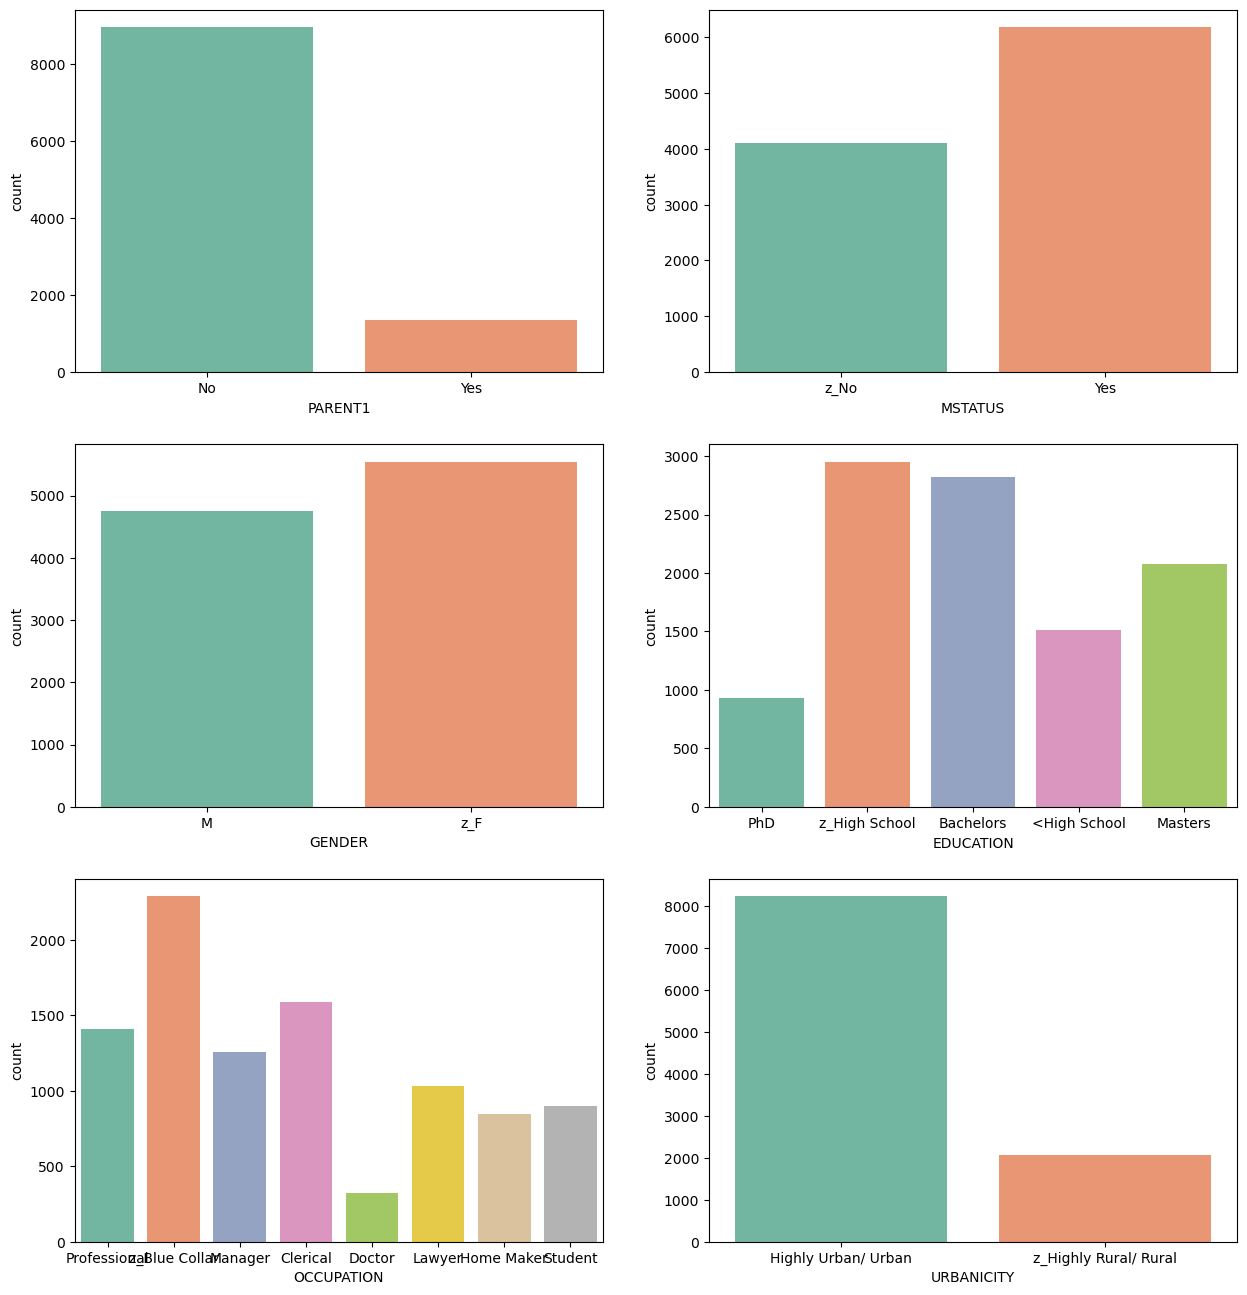

In [8]:
# univariate analysis of categorical columns
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(data['PARENT1'], ax=ax[0,0],palette='Set2')
_=sns.countplot(data['MSTATUS'], ax=ax[0,1], palette='Set2')
_=sns.countplot(data['GENDER'], ax=ax[1,0], palette='Set2')
_=sns.countplot(data['EDUCATION'], ax=ax[1,1],palette='Set2')
_=sns.countplot(data['OCCUPATION'], ax=ax[2,0], palette='Set2')
_=sns.countplot(data['URBANICITY'], ax=ax[2,1], palette='Set2')


In [9]:
#check for null values
data.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

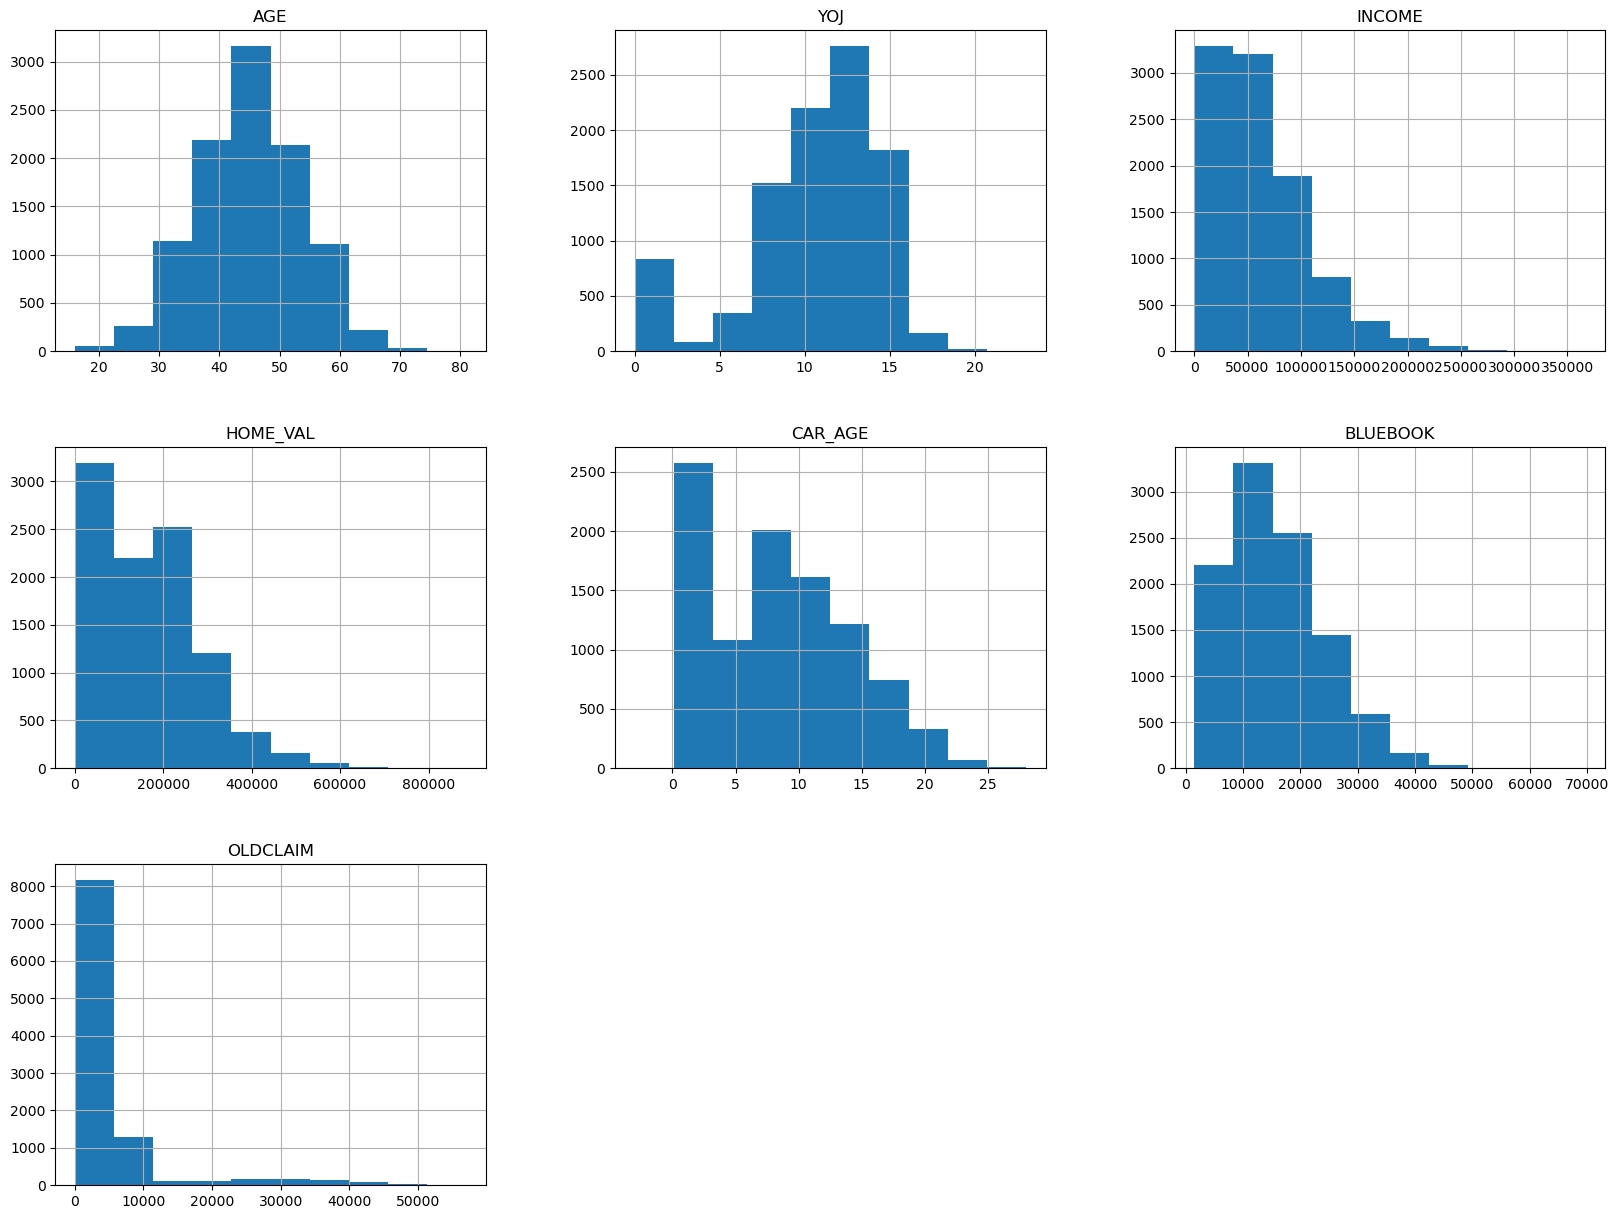

In [10]:
#univariate analysis of numerical columns - continuous variables -
data[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE','BLUEBOOK','OLDCLAIM']].hist(figsize=(20,15))
plt.show()

In [11]:
data[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE','BLUEBOOK','OLDCLAIM']].describe()

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE,BLUEBOOK,OLDCLAIM
count,10295.000000,9754.000000,9732.000000,9727.000000,9663.000000,10302.000000,10302.000000
mean,44.837397,10.474062,61572.073263,154523.018608,8.298148,15659.923316,4033.977868
std,8.606445,4.108943,47457.202749,129188.439405,5.714450,8428.765264,8733.143119
min,16.000000,0.000000,0.000000,0.000000,-3.000000,1500.000000,0.000000
25%,39.000000,9.000000,27584.000000,0.000000,1.000000,9200.000000,0.000000
50%,45.000000,11.000000,53529.000000,160661.000000,8.000000,14400.000000,0.000000
75%,51.000000,13.000000,86166.000000,238256.000000,12.000000,20890.000000,4647.500000
max,81.000000,23.000000,367030.000000,885282.000000,28.000000,69740.000000,57037.000000


In [12]:
#Bivariate variables
data.groupby(by='CLM_AMT').mean()[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE','BLUEBOOK','OLDCLAIM']]

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE,BLUEBOOK,OLDCLAIM
CLM_AMT,,,,,,,
0,45.391794,10.638155,65663.977687,168980.521391,8.675973,16184.720752,3281.59198
30,38.000000,8.000000,62177.000000,178852.000000,8.000000,7300.000000,4717.00000
59,40.000000,14.000000,22705.000000,138803.000000,NaN,7770.000000,28476.00000
96,40.000000,NaN,NaN,206959.000000,1.000000,1500.000000,2154.00000
109,47.000000,0.000000,0.000000,0.000000,1.000000,6200.000000,4754.00000
...,...,...,...,...,...,...,...
77907,32.000000,0.000000,0.000000,0.000000,6.000000,17700.000000,4211.00000
78874,57.000000,16.000000,119068.000000,342788.000000,12.000000,37130.000000,7160.00000
85524,39.000000,10.000000,92264.000000,0.000000,1.000000,22830.000000,10011.00000


In [13]:
#Filter the data
# Convert currecy into floats
def convert_currency(data, columns: list):
    for col in columns:
        data[col] = np.where(pd.isnull(data[col]), data[col], data[col].astype('str').map(lambda x: x.replace(',','').replace('$',''))).astype('float')
currency_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
convert_currency(data, currency_cols)

In [14]:
# There are some values that have a prefix 'z_' that does not mean anything. 
def remove_z(data, columns: list):
    for col in columns:
        data[col] = np.where(pd.isnull(data[col]), data[col], data[col].astype('str').map(lambda x: x.replace('z_','')))
z_cols = ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY']
remove_z(data, z_cols)

In [15]:
# These columns don't add any value. 'BIRTH' is redundant with the 'AGE' column present
data.drop(['BIRTH','ID'], axis=1, inplace=True);

In [16]:
data.head(10)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,...,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
5,0,50.0,0,NaN,114986.0,No,243925.0,Yes,F,PhD,...,SUV,no,19217.0,2,Yes,3,0.0,17.0,0,Highly Urban/ Urban
6,0,34.0,1,12.0,125301.0,Yes,0.0,No,F,Bachelors,...,Sports Car,no,0.0,0,No,0,2946.0,7.0,1,Highly Urban/ Urban
7,0,54.0,0,NaN,18755.0,No,NaN,Yes,F,<High School,...,SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
8,1,40.0,1,11.0,50815.0,Yes,0.0,No,M,High School,...,Minivan,no,3295.0,1,No,2,6477.0,1.0,1,Highly Urban/ Urban
9,0,44.0,2,12.0,43486.0,Yes,0.0,No,F,High School,...,SUV,no,0.0,0,No,0,0.0,10.0,0,Highly Rural/ Rural


In [17]:
#There shouldn't be any claim amount if there isn't any claim.
# Check for positive claims with non-zero claim amount (there shouldn't be any)
data.loc[(data['CLAIM_FLAG'] == False) & (data['CLM_AMT'] > 0), ['CLAIM_FLAG','CLM_AMT']]

,CLAIM_FLAG,CLM_AMT


In [18]:
# Check for positive claims with zero claim amount (there shouldn't be any here either)
data.loc[(data['CLAIM_FLAG'] == True) & (data['CLM_AMT'] <= 0), ['CLAIM_FLAG','CLM_AMT']]

,CLAIM_FLAG,CLM_AMT


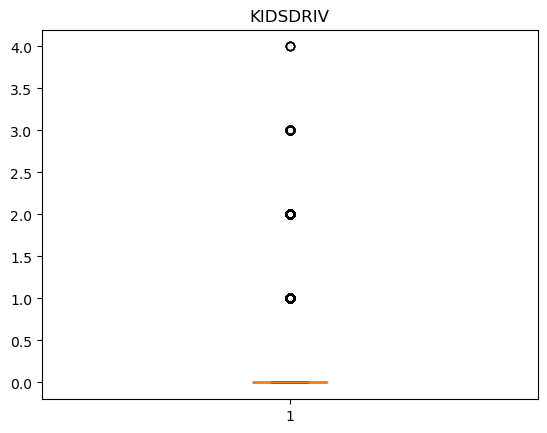

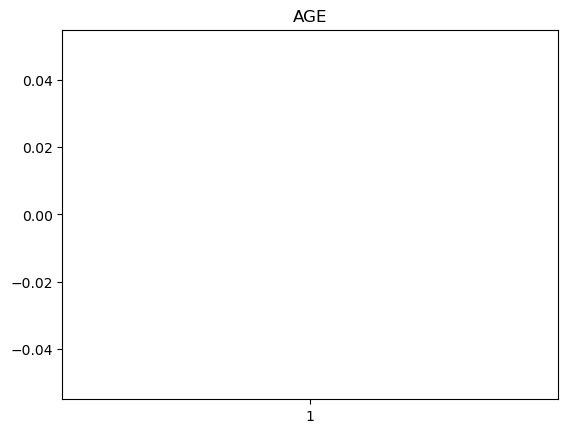

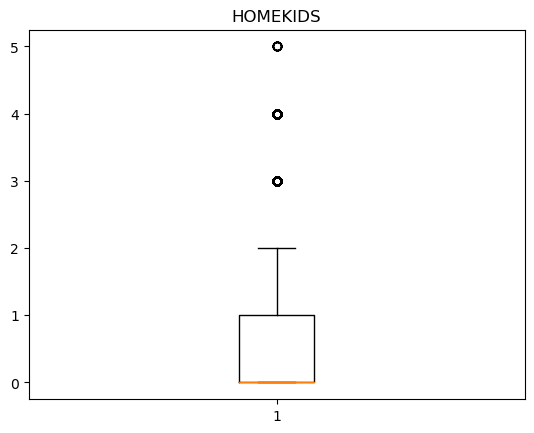

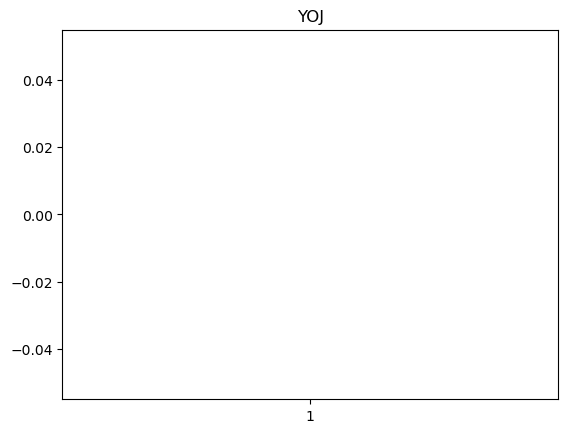

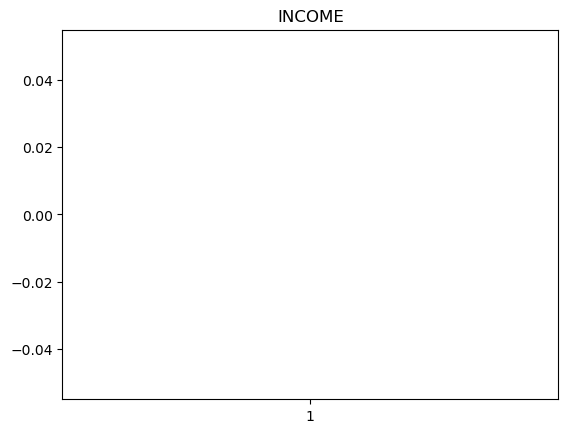

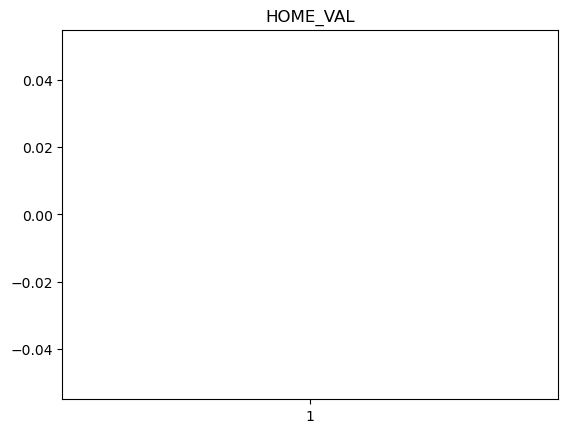

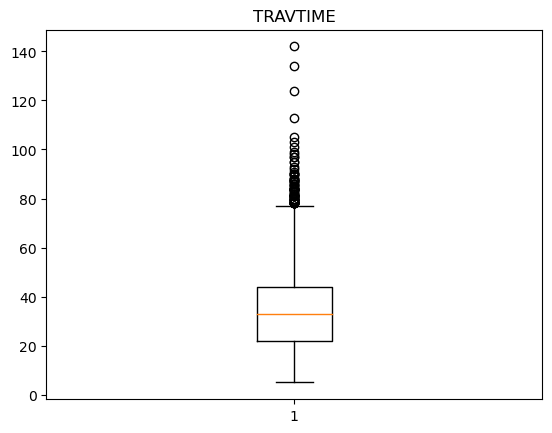

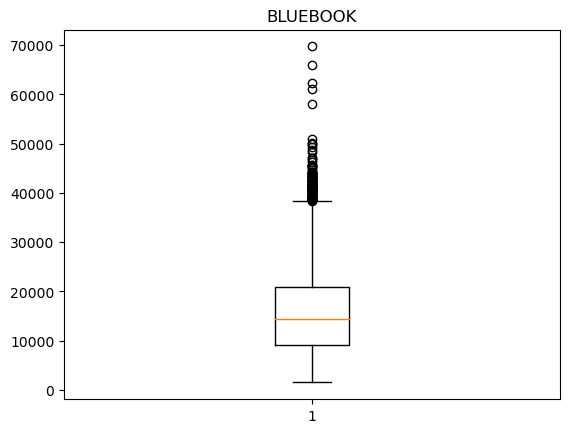

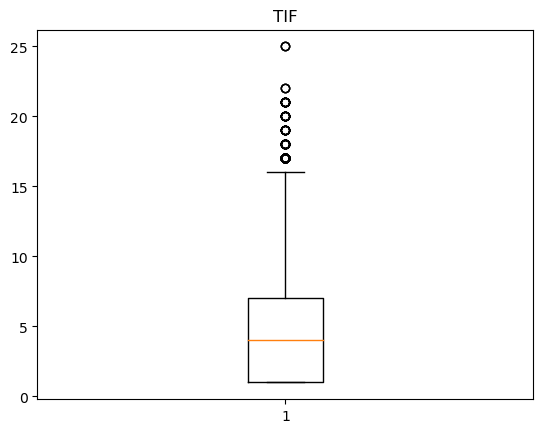

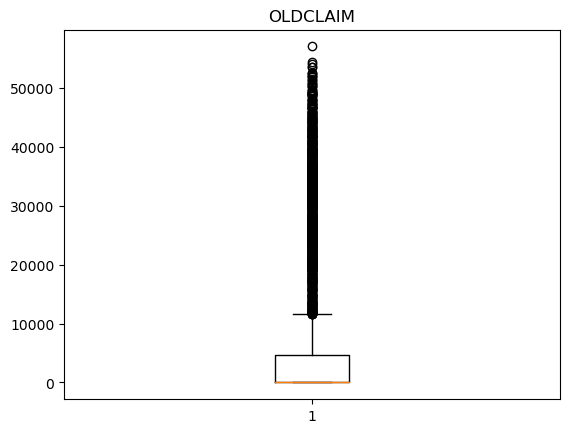

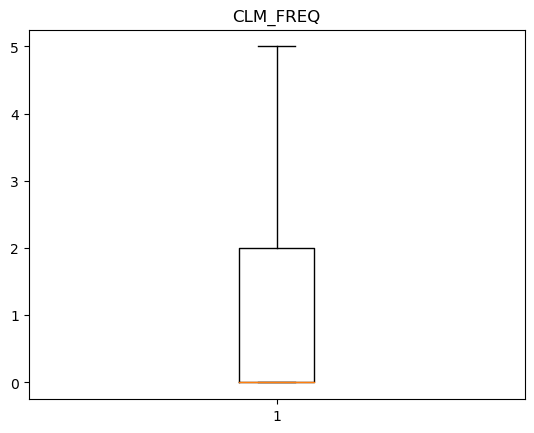

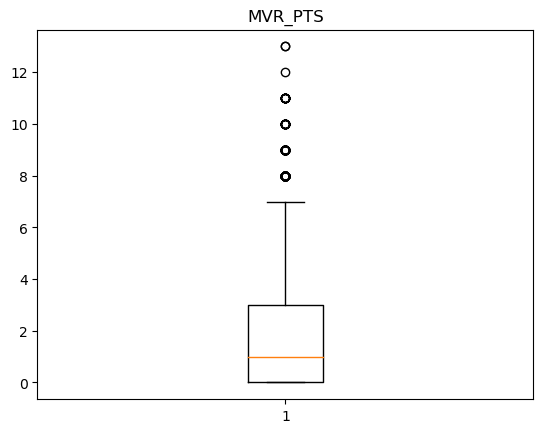

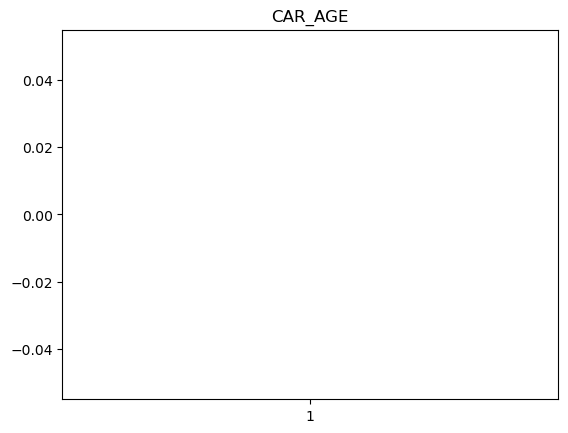

In [19]:
#Boxplot for numerical column
for i in ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CAR_AGE']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

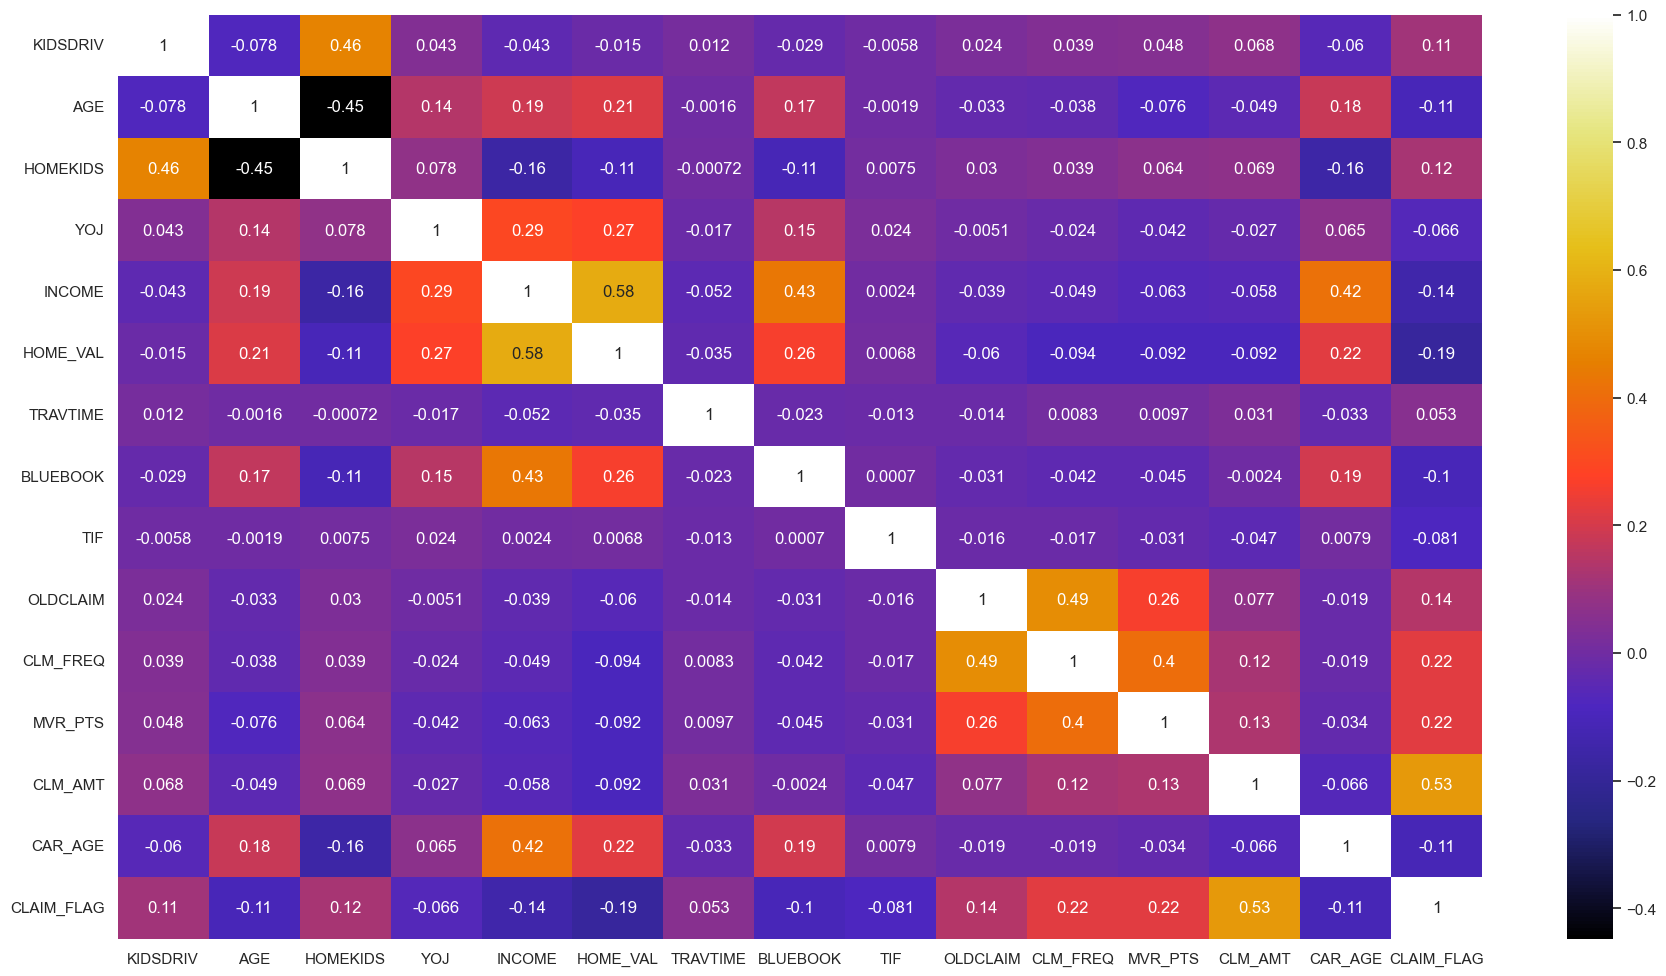

In [20]:
#Bivariate analysis 
#Correlation plot using heatmap
def plot_corr(data):
    corr = data.corr()
    sns.set_theme()
    plt.figure(figsize = (22,12))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(data)

Preprocessing

In [21]:
# drop duplicated row
data.drop_duplicates(inplace=True, keep='first')

In [22]:
#Replace the null values
data['AGE']=data['AGE'].fillna(data['AGE'].mean())
data['YOJ']=data['YOJ'].fillna(data['YOJ'].median())
data['INCOME']=data['INCOME'].fillna(data['INCOME'].median())
data['HOME_VAL']=data['HOME_VAL'].fillna(data['HOME_VAL'].median())
data['CAR_AGE']=data['CAR_AGE'].fillna(data['CAR_AGE'].median())
data['OCCUPATION'] = data['OCCUPATION'].fillna(data['OCCUPATION'].mode()[0])

In [23]:
data.isna().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [24]:
#To treat outliers
#'AGE','YOJ','INCOME','HOME_VAL','CAR_AGE
Q1 = data.AGE.quantile(0.25)
Q3 = data.AGE.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

21.0 69.0 12.0


In [25]:
data.loc[data['AGE']>max_limit,'AGE']=np.mean(data.AGE)	
data.loc[data['AGE']<min_limit,'AGE']=np.mean(data.AGE)

In [26]:
Q1 = data.YOJ.quantile(0.25)
Q3 = data.YOJ.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['YOJ']>max_limit,'YOJ']=np.median(data.YOJ)
data.loc[data['YOJ']<min_limit,'YOJ']=np.median(data.YOJ)

3.0 19.0 4.0


In [27]:
Q1 = data.INCOME.quantile(0.25)
Q3 = data.INCOME.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['INCOME']>max_limit,'INCOME']=np.median(data.INCOME)
data.loc[data.INCOME > max_limit]

-51930.5 164313.5 54061.0


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [28]:
Q1 = data.HOME_VAL.quantile(0.25)
Q3 = data.HOME_VAL.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['HOME_VAL']>max_limit,'HOME_VAL']=np.median(data.HOME_VAL)
data.loc[data.HOME_VAL > max_limit]

-349627.5 582712.5 233085.0


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [29]:
Q1 = data.BLUEBOOK.quantile(0.25)
Q3 = data.BLUEBOOK.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['BLUEBOOK']>max_limit,'BLUEBOOK']=np.mean(data.BLUEBOOK)
data.loc[data.BLUEBOOK > max_limit]

-8335.0 38425.0 11690.0


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [30]:
Q1 = data.OLDCLAIM.quantile(0.25)
Q3 = data.OLDCLAIM.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['OLDCLAIM']>max_limit,'OLDCLAIM']=np.median(data.OLDCLAIM)
data.loc[data.OLDCLAIM > max_limit]

-6972.0 11620.0 4648.0


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [31]:
Q1 = data.CAR_AGE.quantile(0.25)
Q3 = data.CAR_AGE.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)
data.loc[data['CAR_AGE']>max_limit,'CAR_AGE']=np.median(data.CAR_AGE)
data.loc[data.CAR_AGE > max_limit]

-10.5 25.5 9.0


,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [32]:
data.shape

(10301, 25)

In [33]:
data.isna().sum()

KIDSDRIV      0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [34]:
#Label Encoding - PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
le1=LabelEncoder()
data['PARENT1']=le1.fit_transform(data['PARENT1'])
data['MSTATUS']=le1.fit_transform(data['MSTATUS'])
data['GENDER']=le1.fit_transform(data['GENDER'])
data['EDUCATION']=le1.fit_transform(data['EDUCATION'])
data['OCCUPATION']=le1.fit_transform(data['OCCUPATION'])
data['CAR_USE']=le1.fit_transform(data['CAR_USE'])
data['CAR_TYPE']=le1.fit_transform(data['CAR_TYPE'])
data['RED_CAR']=le1.fit_transform(data['RED_CAR'])
data['REVOKED']=le1.fit_transform(data['REVOKED'])
data['URBANICITY']=le1.fit_transform(data['URBANICITY'])
data

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,4,...,0,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,2,...,0,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,1,...,5,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,2,...,3,0,0.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,53526.0,0,306251.0,1,1,0,...,0,1,0.0,0,0,0,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,53526.0,0,386273.0,1,1,4,...,0,0,0.0,0,0,2,0.0,17.0,0,1
10298,0,46.0,0,9.0,107204.0,0,332591.0,1,1,3,...,1,0,0.0,0,0,0,0.0,1.0,0,1
10299,0,48.0,0,15.0,39837.0,0,170611.0,1,0,0,...,3,0,0.0,0,0,0,0.0,1.0,0,1
10300,0,50.0,0,7.0,43445.0,0,149248.0,1,0,1,...,0,0,0.0,0,0,0,0.0,11.0,0,1


In [35]:
#data.columns

In [36]:
#Splitting the data into independent and dependent variables
X=data.drop(['CLAIM_FLAG','CLM_AMT','HOMEKIDS','HOME_VAL','GENDER','EDUCATION','OCCUPATION'],axis=1)
y=data['CLM_AMT']

In [37]:
X

,KIDSDRIV,AGE,YOJ,INCOME,PARENT1,MSTATUS,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,60.0,11.0,67349.0,0,0,14,1,14230.0,11,0,1,4461.0,2,0,3,18.0,1
1,0,43.0,11.0,91449.0,0,0,22,0,14940.0,1,0,1,0.0,0,0,0,1.0,1
2,0,48.0,11.0,52881.0,0,0,26,1,21970.0,1,5,1,0.0,0,0,2,10.0,1
3,0,35.0,10.0,16039.0,0,1,5,1,4010.0,4,3,0,0.0,2,0,3,10.0,1
4,0,51.0,14.0,53526.0,0,1,32,1,15440.0,7,0,1,0.0,0,0,0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,9.0,53526.0,0,1,21,1,13270.0,15,0,0,0.0,0,0,2,17.0,1
10298,0,46.0,9.0,107204.0,0,1,36,0,24490.0,6,1,0,0.0,0,0,0,1.0,1
10299,0,48.0,15.0,39837.0,0,1,12,1,13820.0,7,3,0,0.0,0,0,0,1.0,1
10300,0,50.0,7.0,43445.0,0,1,36,1,22550.0,6,0,0,0.0,0,0,0,11.0,1


In [38]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10297    0.0
10298    0.0
10299    0.0
10300    0.0
10301    0.0
Name: CLM_AMT, Length: 10301, dtype: float64

In [39]:
from deepchecks.tabular import Dataset
X_ds = Dataset(X,cat_features=['PARENT1','MSTATUS','CAR_USE','CAR_TYPE','RED_CAR','REVOKED','URBANICITY'])
check = FeatureFeatureCorrelation() 

check.run(X_ds) 

In [40]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
numeric_features = []

for col in X.columns:
    if(X[col].dtype == "float" ):
        numeric_features.append(col)

X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

,KIDSDRIV,AGE,YOJ,INCOME,PARENT1,MSTATUS,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,1.796857,-0.153207,0.311147,0,0,14,1,-0.142224,11,0,1,1.032815,2,0,3,1.762566,1
1,0,-0.218908,-0.153207,0.961987,0,0,22,0,-0.052195,1,0,1,-0.567179,0,0,0,-1.317365,1
2,0,0.373964,-0.153207,-0.079573,0,0,26,1,0.839222,1,5,1,-0.567179,0,0,2,0.313187,1
3,0,-1.167503,-0.549837,-1.074521,0,1,5,1,-1.438138,4,3,0,-0.567179,2,0,3,0.313187,1
4,0,0.729688,1.036682,-0.062154,0,1,32,1,0.011206,7,0,1,-0.567179,0,0,0,-0.411503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,0.018241,-0.946467,-0.062154,0,1,21,1,-0.263954,15,0,0,-0.567179,0,0,2,1.581394,1
10298,0,0.136816,-0.946467,1.387463,0,1,36,0,1.158762,6,1,0,-0.567179,0,0,0,-1.317365,1
10299,0,0.373964,1.433312,-0.431837,0,1,12,1,-0.194213,7,3,0,-0.567179,0,0,0,-1.317365,1
10300,0,0.611113,-1.739726,-0.334400,0,1,36,1,0.912767,6,0,0,-0.567179,0,0,0,0.494359,1


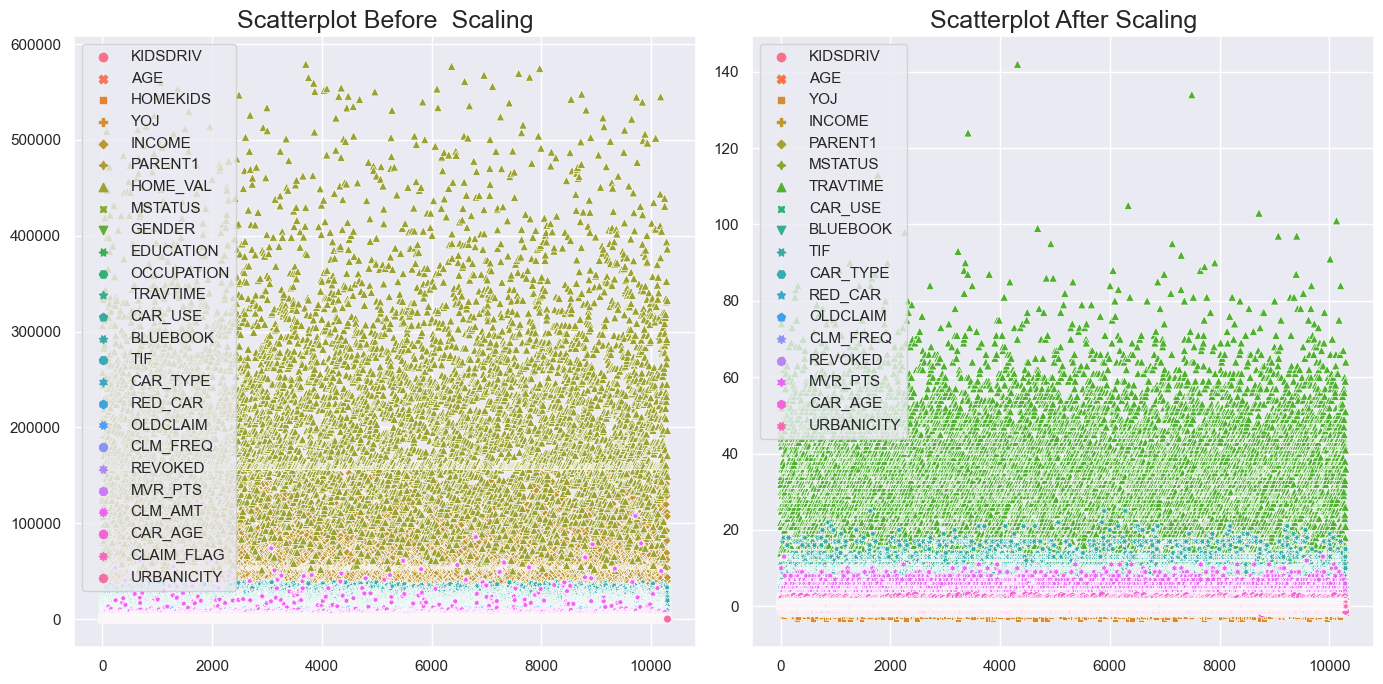

In [41]:
# plotting the scatterplot of before and after  Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before  Scaling", fontsize=18)
sns.scatterplot(data = data, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Scaling", fontsize=18)
sns.scatterplot(data = X, color="red")
plt.tight_layout()
plt.show()

In [42]:
#  mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

In [43]:

#splitting the data into train ,validation,test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.21, random_state=42)

In [44]:
print(X_train.shape),print(y_train.shape)
print(X_val.shape),print(y_val.shape)
print(X_test.shape),print(y_test.shape)

(7730, 18)
(7730,)
(2055, 18)
(2055,)
(516, 18)
(516,)


(None, None)

Feature Selection

           AGE  PARENT1  MSTATUS  CAR_USE  RED_CAR  OLDCLAIM  CLM_FREQ  \
279   0.611113        0        0        1        0  2.168700         2   
8657 -1.048928        0        1        1        0 -0.567179         0   
7312 -0.930354        1        0        1        0 -0.567179         0   
5301  0.729688        0        1        1        0 -0.567179         0   
9648  1.085411        0        1        1        0 -0.567179         0   
...        ...      ...      ...      ...      ...       ...       ...   
9570 -0.218908        0        1        1        1 -0.567179         0   
8695 -0.100333        0        1        1        1 -0.567179         0   
7911  0.373964        0        1        1        0 -0.567179         0   
4076 -1.048928        1        0        0        1 -0.307149         2   
2211  0.611113        0        1        0        0 -0.567179         0   

      REVOKED  MVR_PTS  URBANICITY  
279         0        7           1  
8657        0        0           1  


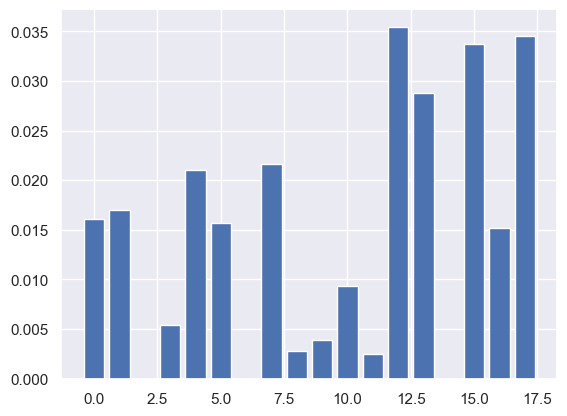

MAE: 2069.824


In [45]:

# define number of features 
# feature selection
X, y = make_regression(n_samples=10301, n_features=18, n_informative=10, noise=0.1, random_state=42)
selector = SelectKBest(mutual_info_regression,k=10)
selector.fit_transform(X_train, y_train)
X_val1 = selector.transform(X_val)
X_test1 = selector.transform(X_test)
selected_features_indices=selector.get_support(indices=True)
selected_features_names=X_train.columns[selected_features_indices]
X_train1=X_train[selected_features_names]
print(X_train1)

def select_features(X_train, y_train,X_val, X_test):
        # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train1 = fs.transform(X_train)
    # transform test input data
    X_val1 = fs.transform(X_val)
    # transform test input data
    X_test1 = fs.transform(X_test)
    return X_train1,X_val1, X_test1,fs
X_train1,X_val1, X_test1, fs = select_features(X_train, y_train,X_val, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
# fit the model
model = LinearRegression()
model.fit(X_train1, y_train)
# evaluate the model
yhat = model.predict(X_val1)
# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

In [46]:
#Create the RFE object
X, y = make_regression(n_samples=10301, n_features=18, n_informative=10, noise=0.1, random_state=42)
model = LinearRegression()      
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)
X_train2 = X_train.columns[rfe.support_]
print('Chosen best  feature by rfe:',X_train2)
#Let’s calculate the accuracy score of the Random Forest classifier when we use only the 10 selected features:
X_train2 = rfe.transform(X_train)
X_val2 = rfe.transform(X_val)
X_test2 = rfe.transform(X_test)


Chosen best  feature by rfe: Index(['KIDSDRIV', 'INCOME', 'PARENT1', 'MSTATUS', 'CAR_USE', 'RED_CAR',
       'OLDCLAIM', 'REVOKED', 'CAR_AGE', 'URBANICITY'],
      dtype='object')


Modelling

In [47]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=0),
    'Neural Network Regression ': MLPRegressor(random_state=0, alpha=1, max_iter=1000),
    'Lasso Regression ': Lasso(random_state=0),
    'Decision Tree Regression ': DecisionTreeRegressor(random_state=0, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=0, max_depth=5, n_estimators=10, max_features=1),
    'KNN Model ': KNeighborsRegressor(3),
    'Support Vector Machines (SVM)': SVR(gamma=2, C=1),
    'XGBRegressor': XGBRegressor(random_state=0)
}


In [49]:
for name,model in models.items():
    model.fit(X_train1,y_train)
    print(name + ' trained')

Linear Regression trained
Ridge Regression trained
Neural Network Regression  trained
Lasso Regression  trained
Decision Tree Regression  trained
Random Forest trained
KNN Model  trained
Support Vector Machines (SVM) trained
XGBRegressor trained


In [50]:
def get_rmse(y_true,y_pred):
    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

In [51]:
for name,model in models.items():
    y_pred = model.predict(X_train1)
    rmse = get_rmse(y_train,y_pred)
    print(name + ' RMSE: {:.2f}'.format(rmse))

Linear Regression RMSE: 4443.12
Ridge Regression RMSE: 4443.12
Neural Network Regression  RMSE: 4439.61
Lasso Regression  RMSE: 4443.12
Decision Tree Regression  RMSE: 4259.53
Random Forest RMSE: 4377.51
KNN Model  RMSE: 3455.08
Support Vector Machines (SVM) RMSE: 4842.94
XGBRegressor RMSE: 1733.70


In [52]:

for name, model in models.items():
    model.fit(X_train1, y_train)
    y_pred = model.predict(X_train1)
    mae = mean_absolute_error(y_train, y_pred)
    print(name + ' MAE: {:.2f}'.format(mae))    

Linear Regression MAE: 1945.34
Ridge Regression MAE: 1945.26
Neural Network Regression  MAE: 1930.01
Lasso Regression  MAE: 1944.71
Decision Tree Regression  MAE: 1895.92
Random Forest MAE: 2011.22
KNN Model  MAE: 1421.07
Support Vector Machines (SVM) MAE: 1490.75
XGBRegressor MAE: 974.72


By looking at the RMSE,MAE: XGBRegressor is the best performing model

In [72]:
# The best model XGBRegressor for validation

xgbr = XGBRegressor()
xgbr.fit(X_train1, y_train)
y_val_pred = xgbr.predict(X_val1)
mae = mean_absolute_error(y_val,y_val_pred)
print('MAE :',mae)

MAE : 2212.232513760708


In [73]:
xgbr = XGBRegressor()
xgbr.fit(X_train1, y_train)
y_test_pred = xgbr.predict(X_test1)
mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)

MAE : 2049.940937854985


Hyperparameter Tuning using RandomizedSearchCV and GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

In [56]:
params = {
    'n_estimators':[500],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [57]:
xgbr = XGBRegressor(nthread=-1)

In [58]:
# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(xgbr, param_distributions=params,n_iter=n_iter_search, cv=5,scoring='neg_mean_squared_error')

In [62]:
start = time.time()
random_search.fit(X_train1, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

[17:06:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:06:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:06:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:06:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:07:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:07:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:07:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:07:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:07:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:08:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:08:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:08:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:09:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:09:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:09:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:10:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:10:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:10:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:10:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:11:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:11:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:11:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

[17:12:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:12:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:12:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:12:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_

In [64]:
best_regressor = random_search.best_estimator_

In [74]:
y_pred1=best_regressor.predict(X_train1)
rmse_pred = mean_absolute_error(y_train, y_pred1) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 44.10604767839923


In [66]:
# Get predictions
y_val_pred1 = best_regressor.predict(X_val1)

array([2862.003  ,  332.68774, -132.72926, ..., 3313.4785 , 3012.069  ,
       3261.6626 ], dtype=float32)

In [67]:
# Calculate MAE
rmse_pred = mean_absolute_error(y_val, y_val_pred1) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 45.495389895345404


In [70]:
# Get predictions
y_test_pred1 = best_regressor.predict(X_test1)

In [71]:
rmse_pred = mean_absolute_error(y_test, y_test_pred1) 

print("Root Mean Absolute Error:" , np.sqrt(rmse_pred))

Root Mean Absolute Error: 44.53805875134543


In [ ]:
#pickled file

In [75]:
XGBR_pkl = open('XGBR.pkl','wb')
pickle.dump(xgbr,XGBR_pkl)
XGBR_pkl.close()

In [76]:
le1_pkl = open('le1.pkl','wb')
pickle.dump(le1,le1_pkl)
le1_pkl.close()